# MLP with normalization techniques

best run

block_size_5__embedding_size_20__hidden_layer_size_400__batch_size_128__learning_rates_A_0.35__learning_rates_B_0.05__epochs_200000____hyperparam_search 
 **eval_loss: 2.0323**, train_loss: 1.8617,  train_time: 383.77s

## Data Preprocessing 

In [1]:
words = open('names.txt', 'r').read().splitlines()

chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

itos = {i: s for s, i in stoi.items()}
print(stoi, itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0} {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [2]:
import torch

# 1. Define a device variable. If a GPU is available, use it.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Get the number of available CUDA devices
    num_devices = torch.cuda.device_count()
    print("Number of CUDA devices:", num_devices)

    # Get information about the current device
    current_device_id = torch.cuda.current_device()
    print("Current device ID:", current_device_id)

    # Get the name of the current device
    device_name = torch.cuda.get_device_name(current_device_id)
    print("Device name:", device_name)

    # Get detailed device properties
    device_props = torch.cuda.get_device_properties(current_device_id)
    print("Device properties:", device_props)

    # Get memory information
    memory_allocated = torch.cuda.memory_allocated(current_device_id)
    memory_reserved = torch.cuda.memory_reserved(current_device_id)
    print("Memory allocated:", memory_allocated)
    print("Memory reserved:", memory_reserved)
else:
    print("CUDA is not available.")

Using device: cuda
Number of CUDA devices: 1
Current device ID: 0
Device name: Quadro P5000
Device properties: _CudaDeviceProperties(name='Quadro P5000', major=6, minor=1, total_memory=16272MB, multi_processor_count=20)
Memory allocated: 0
Memory reserved: 0


## Hyperparameters

In [6]:
runs = {}

In [21]:
for i, v in runs.items():
    print(f"{i} \n eval_loss: {v['eval_loss'].item():.4f}, train_loss: {v['train_loss'].item():.4f},  train_time: {v['time']:.2f}s")

# > previous best result from parameter tuning
# block_size_5__embedding_size_10__hidden_layer_size_200__batch_size_128__learning_rates_A_0.15__learning_rates_B_0.01__epochs_100000___A 
# eval_loss: 2.1952, train_loss: 2.1631,  train_time: 165.22s
    
# > scaling W2 so the logits are not too big 
# block_size_3__embedding_size_10__hidden_layer_size_200__batch_size_32__learning_rates_A_0.1__learning_rates_B_0.02__epochs_100000____W1_scaling_factor 
# eval_loss: 2.1599, train_loss: 2.1056,  train_time: 124.18s
    
# > making sure tanh doesn't oversaturate by scaling down Q1
# block_size_3__embedding_size_10__hidden_layer_size_200__batch_size_32__learning_rates_A_0.1__learning_rates_B_0.02__epochs_100000___A 
# eval_loss: 2.1393, train_loss: 2.0990,  train_time: 124.12s

# > kaimin activation
# block_size_3__embedding_size_10__hidden_layer_size_200__batch_size_32__learning_rates_A_0.1__learning_rates_B_0.02__epochs_100000____kaiming 
# eval_loss: 2.1258, train_loss: 2.0680,  train_time: 118.84s

# > batch norm
# tes_A_0.1__learning_rates_B_0.02__epochs_100000____batch_norm_2 
# eval_loss: 2.1641, train_loss: 2.1409,  train_time: 196.01s

# > removed batch norm, best run so far
# block_size_3__embedding_size_10__hidden_layer_size_200__batch_size_32__learning_rates_A_0.1__learning_rates_B_0.02__epochs_300000____removed_batchnorm 
# eval_loss: 2.1177, train_loss: 2.0359,  train_time: 359.38s


# > hyperparam search - small batch small model small learning rate
#'block_size_5__embedding_size_20__hidden_layer_size_100__batch_size_64__learning_rates_A_0.1__learning_rates_B_0.05__epochs_15000'],
# [2.184032678604126,
#  2.176513910293579,

# > hyperparam serach - big batch big model big learning rate
#  'block_size_5__embedding_size_5__hidden_layer_size_400__batch_size_512__learning_rates_A_0.3__learning_rates_B_0.05__epochs_15000'],
# [2.191435217857361,
#  2.1800073385238647,

# > big batch big model big learning rate
# block_size_5__embedding_size_20__hidden_layer_size_400__batch_size_128__learning_rates_A_0.35__learning_rates_B_0.05__epochs_100000____hyperparam_search 
# eval_loss: 2.0400, train_loss: 1.9188,  train_time: 184.27s

block_size_5__embedding_size_20__hidden_layer_size_400__batch_size_128__learning_rates_A_0.35__learning_rates_B_0.05__epochs_100000____hyperparam_search 
 eval_loss: 2.0400, train_loss: 1.9188,  train_time: 184.27s
block_size_5__embedding_size_20__hidden_layer_size_400__batch_size_128__learning_rates_A_0.35__learning_rates_B_0.05__epochs_200000____hyperparam_search 
 eval_loss: 2.0323, train_loss: 1.8617,  train_time: 383.77s
block_size_5__embedding_size_5__hidden_layer_size_400__batch_size_128__learning_rates_A_0.4__learning_rates_B_0.1__epochs_100000____hyperparam_search 
 eval_loss: 2.1260, train_loss: 2.0872,  train_time: 180.67s
block_size_5__embedding_size_20__hidden_layer_size_100__batch_size_64__learning_rates_A_0.1__learning_rates_B_0.005__epochs_100000____hyperparam_search 
 eval_loss: 2.0913, train_loss: 2.0298,  train_time: 184.43s


In [ ]:
# hyperparameter search
import itertools
candidate_embedding_sizes = [5, 20, 30]
candidate_hidden_layer_sizes = [100, 200, 400]
candidate_batch_sizes = [32 *2, 32 * 8, 32 * 16]  # e.g., 128 and 256
candidate_learning_rates_A = [0.1, 0.2, 0.3]
candidate_learning_rates_B = [0.01, 0.02, 0.05]
block_sizes = [2, 3, 4, 5]

# To remember the configuration used for each run, we store a copy in a dictionary.
configs = {}

# Use itertools.product to iterate over all combinations.
for embedding, hidden, batch, lrA, lrB, block_size in itertools.product(
        candidate_embedding_sizes,
        candidate_hidden_layer_sizes,
        candidate_batch_sizes,
        candidate_learning_rates_A,
        candidate_learning_rates_B, block_sizes):

    # Update the global hyperparams for this configuration.
    hyperparams['block_size'] = block_size  # fixed as you requested
    hyperparams['embedding_size'] = embedding
    hyperparams['hidden_layer_size'] = hidden
    hyperparams['batch_size'] = batch
    hyperparams['learning_rates_A'] = lrA
    hyperparams['learning_rates_B'] = lrB
    hyperparams['epochs'] = 15000  # short run: 100k epochs

    # Get the run name (which encodes the hyperparameter settings)
    run_name = hyperparams_to_run_name()
    
    print(f"HYPERPARAMETERS SEARCH, START {run_name}")
    
     # Run two independent runs for this configuration.
    for run_idx in range(2):
        # Insert a run index into hyperparams so that run name becomes unique.
        hyperparams['run_idx'] = run_idx
        # The run name will now include the run_idx value.
        run_name = hyperparams_to_run_name()
        run()  # This call should update the global "runs" dictionary with key run_name.
        
     # Clean up: remove run_idx from hyperparams for the next configuration.
    if 'run_idx' in hyperparams:
        del hyperparams['run_idx']
 # ----------------------------------------------------------
# Aggregate results: group the two runs for each configuration and average their eval_loss.
aggregated_results = {}
for run_name, result in runs.items():
    if "eval_loss" not in result:
        print(f"Warning: run {run_name} has no 'eval_loss' value.")
        continue
    # The base name is the part before the "__run_idx_" substring.
    base_name = run_name.split("__run_idx_")[0]
    aggregated_results.setdefault(base_name, []).append(result['eval_loss'])

avg_results = []
for base_name, losses in aggregated_results.items():
    avg_loss = sum(losses) / len(losses)
    avg_results.append((avg_loss, base_name))

# Sort by average loss (lower is better) and select the top 5.
avg_results.sort(key=lambda x: x[0])
top5 = avg_results[:5]

print("\nTop 5 configurations based on average eval_loss:")
for avg_loss, base_name in top5:
    print(f"  Base Run: {base_name}  -> Average Loss: {avg_loss:.4f}")

# ----------------------------------------------------------
# Phase 3: Re-run the Top 5 Configurations for longer training.
for avg_loss, base_name in top5:
    # Retrieve the saved base configuration.
    config = configs[base_name].copy()
    # Set a longer training duration.
    config['epochs'] = 500000

    # Update the global hyperparams with this configuration.
    hyperparams.update(config)

    # Compute a new run name for the long run.
    long_run_name = ''.join([f"{k}_{v}__" for k, v in hyperparams.items()]) + RUN_NAME + "_long_run"
    print(f"\nRe-running top configuration for long training: {long_run_name}")

    run()  # This long run should store its results in runs[long_run_name]
    print(f"Completed long run: {long_run_name}")

In [ ]:
runs

In [26]:
# Aggregate results: group the two runs for each configuration and average their eval_loss.
aggregated_results = {}
for run_name, result in runs.items():
    if "eval_loss" not in result:
        print(f"Warning: run {run_name} has no 'eval_loss' value.")
        continue
    # The base name is the part before the "__run_idx_" substring.
    base_name = run_name.split("__run_idx_")[0]
    aggregated_results.setdefault(base_name, []).append(result['eval_loss'])

avg_results = []
for base_name, losses in aggregated_results.items():
    avg_loss = sum(losses) / len(losses)
    avg_results.append((avg_loss, base_name))

# Sort by average loss (lower is better) and select the top 5.
avg_results.sort(key=lambda x: x[0])
top5 = avg_results[:5]

print("\nTop 5 configurations based on average eval_loss:")
for avg_loss, base_name in top5:
    print(f"  Base Run: {base_name}  -> Average Loss: {avg_loss:.4f}")


Top 5 configurations based on average eval_loss:
  Base Run: block_size_3__embedding_size_5__hidden_layer_size_100__batch_size_64__learning_rates_A_0.1__learning_rates_B_0.01__epochs_15000____removed_batchnorm  -> Average Loss: 2.3319
  Base Run: block_size_2__embedding_size_5__hidden_layer_size_100__batch_size_64__learning_rates_A_0.1__learning_rates_B_0.01__epochs_15000  -> Average Loss: 2.3914
  Base Run: block_size_2__embedding_size_5__hidden_layer_size_100__batch_size_64__learning_rates_A_0.1__learning_rates_B_0.01__epochs_15000____removed_batchnorm  -> Average Loss: 2.3966


In [24]:
results = []
for run_name, result in runs.items():
    # If no loss is reported, skip this run.
    if "eval_loss" not in result:
        print(f"Warning: run {run_name} has no 'loss' value.")
        continue
    results.append((result['eval_loss'], run_name))

# Sort the results by loss (ascending: lower loss is better)
results.sort(key=lambda x: x[0])
top5 = results[:5]

print("\nTop 5 configurations based on loss:")
for loss, run_name in top5:
    print(f"  Run: {run_name}  -> Loss: {loss:.4f}")


Top 5 configurations based on loss:
  Run: block_size_3__embedding_size_5__hidden_layer_size_100__batch_size_64__learning_rates_A_0.1__learning_rates_B_0.01__epochs_15000____removed_batchnorm  -> Loss: 2.3319
  Run: block_size_2__embedding_size_5__hidden_layer_size_100__batch_size_64__learning_rates_A_0.1__learning_rates_B_0.01__epochs_15000____removed_batchnorm  -> Loss: 2.3966


In [19]:
RUN_NAME = "__hyperparam_search"
hyperparams = {
'block_size': 5,
'embedding_size': 20,
'hidden_layer_size': 100,
'batch_size': 32*2,
'learning_rates_A': 0.10,
'learning_rates_B': 0.005,
'epochs': 100000
}


def hyperparams_to_run_name():
    if RUN_NAME == "": return "last_run_(not_logged)"
    return ''.join([f"{k}_{v}__" for k, v in hyperparams.items()]) + RUN_NAME

hyperparams_to_run_name()


## Training Data



def run():
    """
    e2e runs with values in hyperparams
    save params in runs[run_name]
    """
    print(f"starting run: {hyperparams_to_run_name()}")
    
    block_size = hyperparams['block_size']
    embedding_size = hyperparams['embedding_size']
    epochs = hyperparams['epochs']
    learning_rates = [0, 0]
    learning_rates[0] = hyperparams['learning_rates_A']
    learning_rates[1] = hyperparams['learning_rates_B']
    hidden_layer_size = hyperparams['hidden_layer_size']
    batch_size = hyperparams['batch_size']
    
    
    import torch



    def build_dataset(words):
        X, Y = [], []
        for w in words:
            context = [0] * block_size
            for ch in w + '.':
                ix = stoi[ch]
                X.append(context)
                Y.append(ix)
                #print(context, ix)
                #print(''.join(itos[i] for i in context), '->', itos[ix])
                context = context[1:] + [ix]

        X = torch.tensor(X, device=device)
        Y = torch.tensor(Y, device=device)
        return X, Y

    import random
    random.seed(42)
    random.shuffle(words)
    n1 = int(0.8*len(words))
    n2 = int(0.9*len(words))

    Xtr, Ytr = build_dataset(words[:n1])
    Xval, Yval = build_dataset(words[n1:n2])
    Xte, Yte = build_dataset(words[n2:])



    ## Model

    ### Initialization

    # iniitalization at the beginnning should be
    import torch
    -torch.log(torch.tensor([1/27])) 
    # this would be loss for uniform distribution for 27 classes

    logits = torch.zeros(8, dtype=torch.float)
    logits = torch.tensor([2,10,5,3,30,-10,2,3], dtype=torch.float)
    logits = torch.randn(8) * 10
    # if the numebers are high unlikely you will be guessing the right bucket
    # we want to set logits to be close to uniform distributioun, for instance all equal, 
    # to get loss that's ckloser to uniform distribution loss
    #print(logits)
    probs = torch.softmax(logits, dim=0)
    -torch.log(probs[2])

    # if we oversaturate the tanh there is going to be dead neurons (weight > 0.99)
    # in the whole forward pass they will never get activated

    # you want to have unit gaussian over the net
    # if you multiply to gaussian the variance increase

    # https://arxiv.org/abs/1502.01852
    # Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification

    # batch norm + layer norm + residual network + adam optimizer
    # make it so initialization less important


    C = torch.randn((27, embedding_size), device=device)
    W1_multiplier = (5/3) / ((embedding_size * block_size) ** 0.5)
    W1 = torch.randn((embedding_size * block_size, hidden_layer_size), device=device) * W1_multiplier
    b1 = torch.randn(hidden_layer_size, device=device) * 0
    W2 = torch.randn((hidden_layer_size, 27), device=device) * 0.1
    b2 = torch.randn(27, device=device) * 0 
    bn_bias = torch.zeros((1, hidden_layer_size), device=device)
    bn_gain = torch.zeros((1, hidden_layer_size), device=device)
    bn_running_mean = torch.zeros((1, hidden_layer_size), device=device)
    bn_running_std = torch.zeros((1, hidden_layer_size), device=device)

    parameters = [C, W1, b1, W2, b2]
    parameters += [ bn_bias, bn_gain]

    for p in parameters:
      p.requires_grad = True

    #print(sum(p.nelement() for p in parameters))

    lri = []
    lossi = []
    lossepochs = []

    #logits = h @ W2 + b2
    #counts = logits.exp()
    #prob = counts / counts.sum(1, keepdims=True)

    #loss = -prob[torch.arange(32), Y].log().mean() 
    # here the mean means we take the mean of all the losses
    # of all individual training examples

    #loss == F.cross_entropy(logits, Y)

    #lre = torch.linspace(-3, 0, 1000)
    #lrs = 10**lre`b
    #lrs.shape

    W1.std(), W2.std()

    ## Training

    """
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), device=device)
    print(ix.shape)
    print(Xtr.shape)
    x = Xtr[ix]
    print(x.shape)
    print(C.shape)
    print(C[x].shape)
    emb = C[x]
    emb.view(-1,  block_size * embedding_size).shape
    """

    # preact_h.shape, preact_h.mean(), preact_h.std()

    # batch normalization, we take the hidden state, 
    # and for each element in the hidden state we normalize it across the batch
    # preact_h.mean(0, keepdim=True).shape, preact_h.std(0, keepdim=True).shape

    # and then we add bias and scale (one per hidden layer parameter) so that nn can retain information after 
    # normalizing

    # issue with batch norm is that it couples different examples, 
    # because it acts as a regularizer, non deterministic over single example 

    import torch.nn.functional as F



    import time
    start_time = time.time()

    for epoch in range(epochs):

        if epoch % 10000 == 0:
            print(epoch)

        learning_rate = learning_rates[0] if epoch < int(epochs/2) else learning_rates[1]

        #minibatch 
        ix = torch.randint(0, Xtr.shape[0], (batch_size,), device=device)

        # forward pass|
        emb = C[Xtr[ix]]

        preact_h = emb.view(-1, block_size * embedding_size) @ W1 + b1

        # batch norm
        preact_h_mean = preact_h.mean(0, keepdim=True)
        preact_h_std = preact_h.std(0, keepdim=True)
        preact_h = (preact_h - preact_h_mean) / preact_h_std
        preact_h = preact_h * bn_gain + bn_bias 

        with torch.no_grad():
            bn_running_mean = 0.99 * bn_running_mean + 0.01 * preact_h_mean
            bn_running_std = 0.99 * bn_running_std + 0.01 * preact_h_std

        h = torch.tanh(preact_h)
        logits = h @ W2 + b2
        loss = F.cross_entropy(logits, Ytr[ix])
        #print(loss.item())

        # backward
        for p in parameters:
            p.grad = None
        loss.backward()
        for p in parameters:
            p.data -= learning_rate * p.grad

        if epoch % 50 == 0:
            #lri.append(lre[i].item
            lossi.append(loss.item())
            lossepochs.append(epoch)

    end_time = time.time()


    print("train() COMPLETED")


    bn_running_std

    @torch.no_grad()
    def eval():
        # forward pass

        def inference(X, Y):
            emb = C[X]
            preact_h = emb.view(-1, block_size * embedding_size) @ W1 + b1

            # batch norm
            preact_h = (preact_h - bn_running_mean) / bn_running_std
            preact_h = preact_h * bn_gain + bn_bias 

            h = torch.tanh(preact_h)
            logits = h @ W2 + b2
            loss = F.cross_entropy(logits, Y)
            return loss

        eval_loss = inference(Xval, Yval)
        print(eval_loss.item())

        train_loss = inference(Xtr, Ytr)
        print(train_loss.item())


        run_name = hyperparams_to_run_name()
        runs[run_name] = {'eval_loss': eval_loss, 'train_loss': train_loss, 'lossi': lossi, 'lossepochs': lossepochs, 'time': end_time - start_time }

    eval()
    


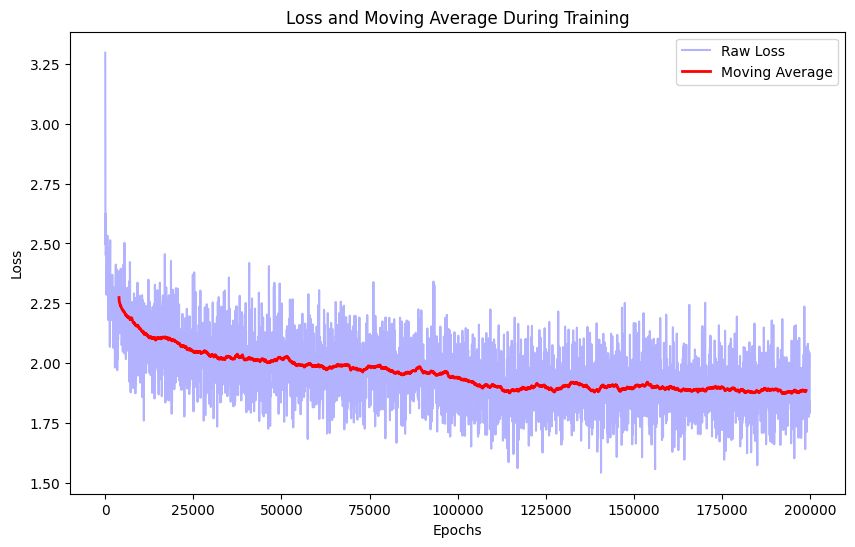

In [14]:

import matplotlib.pyplot as plt
import numpy as np


losses, loss_epochs = runs['block_size_5__embedding_size_20__hidden_layer_size_400__batch_size_128__learning_rates_A_0.35__learning_rates_B_0.05__epochs_200000____hyperparam_search']['lossi'], runs['block_size_5__embedding_size_20__hidden_layer_size_400__batch_size_128__learning_rates_A_0.35__learning_rates_B_0.05__epochs_200000____hyperparam_search']['lossepochs']

# Compute and Plot Moving Average of Loss
window_size = 100  # Adjust as needed

# Ensure we don't compute beyond available data
moving_avg = [sum(losses[i:i+window_size]) / window_size 
              for i in range(len(losses) - window_size + 1)]

# Adjust loss_epochs to match the correct indices
aligned_loss_epochs = [l + len(moving_avg) for l in loss_epochs[:len(moving_avg)]]

plt.figure(figsize=(10, 6))
plt.plot(loss_epochs, losses, label='Raw Loss', color='blue', alpha=0.3)
plt.plot(aligned_loss_epochs, moving_avg, label='Moving Average', color='red', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and Moving Average During Training')
plt.legend()
plt.show()

In [20]:
run()

starting run: block_size_5__embedding_size_20__hidden_layer_size_100__batch_size_64__learning_rates_A_0.1__learning_rates_B_0.005__epochs_100000____hyperparam_search
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
train() COMPLETED
2.0913026332855225
2.029752492904663


(array([2., 4., 3., 6., 1., 1., 4., 3., 1., 2.]),
 array([-1.44288194, -1.16160679, -0.88033164, -0.59905654, -0.31778139,
        -0.03650624,  0.2447689 ,  0.52604407,  0.80731916,  1.08859432,
         1.36986947]),
 <BarContainer object of 10 artists>)

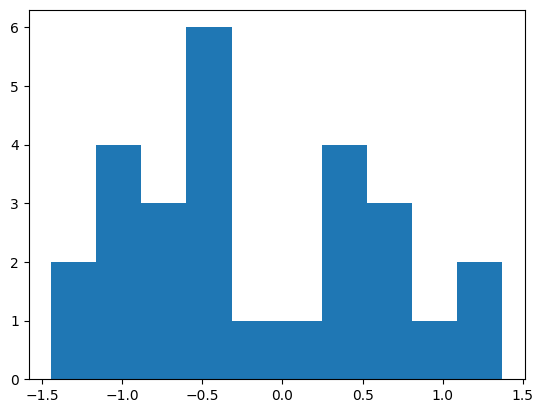

In [101]:
plt.hist(logits[0].cpu().detach().numpy())

In [96]:
h.shape

torch.Size([32, 200])

(array([856., 338., 218., 159., 139., 148.,  98., 117.,  68.,  85.,  91.,
         83.,  77.,  87.,  57.,  60.,  77.,  71.,  62.,  55.,  84.,  68.,
         47.,  58.,  74.,  62.,  75.,  55.,  48.,  59.,  83.,  61.,  77.,
         59.,  66.,  57.,  76.,  97.,  81., 101.,  78., 117.,  93., 120.,
        121., 126., 144., 240., 305., 722.]),
 array([-9.99994159e-01, -9.59994936e-01, -9.19995713e-01, -8.79996490e-01,
        -8.39997268e-01, -7.99998045e-01, -7.59998822e-01, -7.19999599e-01,
        -6.80000377e-01, -6.40001154e-01, -6.00001931e-01, -5.60002708e-01,
        -5.20003486e-01, -4.80004263e-01, -4.40005040e-01, -4.00005817e-01,
        -3.60006595e-01, -3.20007372e-01, -2.80008149e-01, -2.40008926e-01,
        -2.00009704e-01, -1.60010481e-01, -1.20011258e-01, -8.00120354e-02,
        -4.00128126e-02, -1.35898590e-05,  3.99856329e-02,  7.99848557e-02,
         1.19984078e-01,  1.59983301e-01,  1.99982524e-01,  2.39981747e-01,
         2.79980969e-01,  3.19980192e-01,  3.59979

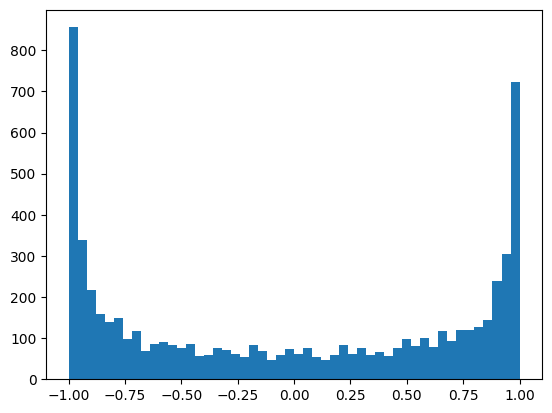

In [153]:
# saturation of the tanh
# need to make sure what gets in the tanh is between -1 and 1, otherwsie
# the delts between 10 and 100 in tanh won't be different
plt.hist(h.view(-1).tolist(), 50)

In [152]:
preact_h.std(), W1.std(), b1.std(), h.std()

(tensor(1.6745, device='cuda:0', grad_fn=<StdBackward0>),
 tensor(0.3009, device='cuda:0', grad_fn=<StdBackward0>),
 tensor(0.0202, device='cuda:0', grad_fn=<StdBackward0>),
 tensor(0.7589, device='cuda:0', grad_fn=<StdBackward0>))

(array([  4.,   0.,   0.,   1.,   2.,   3.,   7.,  15.,  13.,  25.,  32.,
         48.,  48.,  75.,  87., 100., 130., 157., 201., 206., 252., 259.,
        291., 312., 343., 351., 389., 357., 340., 360., 334., 256., 240.,
        241., 196., 172., 144., 110.,  79.,  67.,  42.,  39.,  26.,  12.,
         16.,   5.,   6.,   3.,   2.,   2.]),
 array([-6.36965036, -6.13213553, -5.8946207 , -5.65710588, -5.41959105,
        -5.18207622, -4.94456139, -4.70704656, -4.46953173, -4.2320169 ,
        -3.99450207, -3.75698724, -3.51947241, -3.28195758, -3.04444275,
        -2.80692792, -2.56941309, -2.33189826, -2.09438343, -1.8568686 ,
        -1.61935377, -1.38183894, -1.14432411, -0.90680928, -0.66929445,
        -0.43177962, -0.19426479,  0.04325004,  0.28076487,  0.5182797 ,
         0.75579453,  0.99330935,  1.23082418,  1.46833901,  1.70585384,
         1.94336867,  2.1808835 ,  2.41839833,  2.65591316,  2.89342799,
         3.13094282,  3.36845765,  3.60597248,  3.84348731,  4.08100214,
 

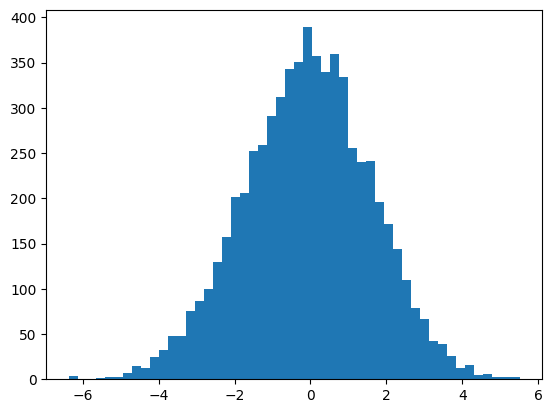

In [148]:
plt.hist(preact_h.view(-1).tolist(), 50)

In [79]:
h.abs().cpu().shape

torch.Size([182441, 200])

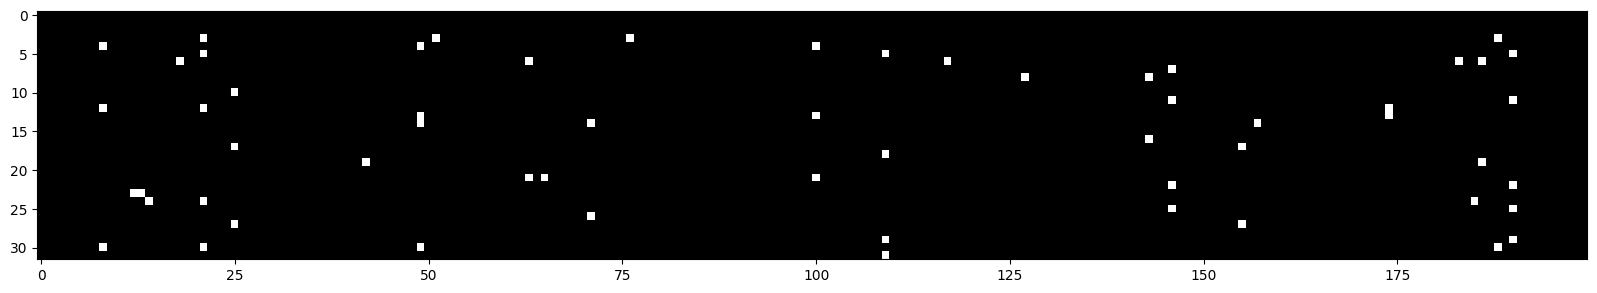

In [120]:
plt.figure(figsize=(20,10))
plt.imshow(h.abs().cpu() > 0.99, cmap='gray', interpolation='nearest')

# dead neurons

## Inference

In [22]:
@torch.no_grad()
def inference():
    sentence, end_token = [".", ".", "."], False
    while not end_token:
        context_ixs = [stoi[x] for x in sentence[-3:]]
        x_inference = torch.tensor(context_ixs, dtype=torch.int)
        emb = C[x_inference]
        final_layer = torch.tanh(emb.view(1, block_size * embedding_size) @ W1 + b1) @ W2 + b2
        probabilities = torch.exp(final_layer) / torch.sum(torch.exp(final_layer), axis=1, keepdim=True)
        next_letter = itos[torch.multinomial(probabilities, num_samples=1).item()]
        sentence.append(next_letter)
        if next_letter == '.':
            end_token = True
    print(''.join(sentence))

for _ in range(50):
    inference()

NameError: name 'C' is not defined

# Model

In [ ]:
  C = torch.randn((27, embedding_size), device=device)
    W1_multiplier = (5/3) / ((embedding_size * block_size) ** 0.5)
    W1 = torch.randn((embedding_size * block_size, hidden_layer_size), device=device) * W1_multiplier
    b1 = torch.randn(hidden_layer_size, device=device) * 0
    W2 = torch.randn((hidden_layer_size, 27), device=device) * 0.1
    b2 = torch.randn(27, device=device) * 0 
    bn_bias = torch.zeros((1, hidden_layer_size), device=device)
    bn_gain = torch.zeros((1, hidden_layer_size), device=device)
    bn_running_mean = torch.zeros((1, hidden_layer_size), device=device)
    bn_running_std = torch.zeros((1, hidden_layer_size), device=device)

    parameters = [C, W1, b1, W2, b2]
    parameters += [ bn_bias, bn_gain]

    for p in parameters:
      p.requires_grad = True

    #print(sum(p.nelement() for p in parameters))

    lri = []
    lossi = []
    lossepochs = []

    #logits = h @ W2 + b2
    #counts = logits.exp()
    #prob = counts / counts.sum(1, keepdims=True)

    #loss = -prob[torch.arange(32), Y].log().mean() 
    # here the mean means we take the mean of all the losses
    # of all individual training examples

    #loss == F.cross_entropy(logits, Y)

    #lre = torch.linspace(-3, 0, 1000)
    #lrs = 10**lre`b
    #lrs.shape

    W1.std(), W2.std()

    ## Training

    """
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), device=device)
    print(ix.shape)
    print(Xtr.shape)
    x = Xtr[ix]
    print(x.shape)
    print(C.shape)
    print(C[x].shape)
    emb = C[x]
    emb.view(-1,  block_size * embedding_size).shape
    """

    # preact_h.shape, preact_h.mean(), preact_h.std()

    # batch normalization, we take the hidden state, 
    # and for each element in the hidden state we normalize it across the batch
    # preact_h.mean(0, keepdim=True).shape, preact_h.std(0, keepdim=True).shape

    # and then we add bias and scale (one per hidden layer parameter) so that nn can retain information after 
    # normalizing

    # issue with batch norm is that it couples different examples, 
    # because it acts as a regularizer, non deterministic over single example 

    import torch.nn.functional as F



    import time
    start_time = time.time()

    for epoch in range(epochs):

        if epoch % 10000 == 0:
            print(epoch)

        learning_rate = learning_rates[0] if epoch < int(epochs/2) else learning_rates[1]

        #minibatch 
        ix = torch.randint(0, Xtr.shape[0], (batch_size,), device=device)

        # forward pass|
        emb = C[Xtr[ix]]

        preact_h = emb.view(-1, block_size * embedding_size) @ W1 + b1

        # batch norm
        preact_h_mean = preact_h.mean(0, keepdim=True)
        preact_h_std = preact_h.std(0, keepdim=True)
        preact_h = (preact_h - preact_h_mean) / preact_h_std
        preact_h = preact_h * bn_gain + bn_bias 

        with torch.no_grad():
            bn_running_mean = 0.99 * bn_running_mean + 0.01 * preact_h_mean
            bn_running_std = 0.99 * bn_running_std + 0.01 * preact_h_std

        h = torch.tanh(preact_h)
        logits = h @ W2 + b2
        loss = F.cross_entropy(logits, Ytr[ix])
        #print(loss.item())

        # backward
        for p in parameters:
            p.grad = None
        loss.backward()
        for p in parameters:
            p.data -= learning_rate * p.grad

        if epoch % 50 == 0:
            #lri.append(lre[i].item
            lossi.append(loss.item())
            lossepochs.append(epoch)

    end_time = time.time()


# Appendix

In [40]:
torch.cat([emb[:, i, :] for i in range(block_size)], 1).shape

torch.Size([32, 6])

In [43]:
torch.cat(torch.unbind(emb, 1), 1)

tensor([[-0.1152, -1.1897, -0.1152, -1.1897, -0.1152, -1.1897],
        [-0.1152, -1.1897, -0.1152, -1.1897,  0.2716,  1.0055],
        [-0.1152, -1.1897,  0.2716,  1.0055, -0.7203, -0.5304],
        [ 0.2716,  1.0055, -0.7203, -0.5304, -0.7203, -0.5304],
        [-0.7203, -0.5304, -0.7203, -0.5304,  0.2930,  0.3207],
        [-0.1152, -1.1897, -0.1152, -1.1897, -0.1152, -1.1897],
        [-0.1152, -1.1897, -0.1152, -1.1897,  1.3084,  0.0505],
        [-0.1152, -1.1897,  1.3084,  0.0505, -0.7158,  0.4897],
        [ 1.3084,  0.0505, -0.7158,  0.4897, -1.0853,  2.4026],
        [-0.7158,  0.4897, -1.0853,  2.4026,  0.0674, -0.0325],
        [-1.0853,  2.4026,  0.0674, -0.0325, -1.0853,  2.4026],
        [ 0.0674, -0.0325, -1.0853,  2.4026,  0.2930,  0.3207],
        [-0.1152, -1.1897, -0.1152, -1.1897, -0.1152, -1.1897],
        [-0.1152, -1.1897, -0.1152, -1.1897,  0.2930,  0.3207],
        [-0.1152, -1.1897,  0.2930,  0.3207,  0.0674, -0.0325],
        [ 0.2930,  0.3207,  0.0674, -0.0

In [48]:
a = torch.arange(18)
a.shape

torch.Size([18])

In [49]:
a.view(2, 9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [52]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [55]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T